In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [66]:
data = pd.read_csv('../../dataset/clustering/clustering.csv')
feature_names = data.columns.tolist()
data.head()

,able,ableism,abou,absolutely,abt,abuse,abusive,accept,acceptable,accepting,...,yummy,yup,yur,zero,zille,zionazi,zionazis,zionism,zionist,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data normalization (`MinMaxScaler`)

In [67]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns.tolist())
data.head()

,able,ableism,abou,absolutely,abt,abuse,abusive,accept,acceptable,accepting,...,yummy,yup,yur,zero,zille,zionazi,zionazis,zionism,zionist,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Reducing dimension due to the lack of computing power to train the models

## TruncatedSVD

In [45]:
tsvd = TruncatedSVD(n_components=1500)
tsvd.fit(data)

data = tsvd.transform(data)

# Choosing the best model based on linkage

### Linkage = `ward`

In [46]:
hier_ward = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_distances=True)
hier_ward.fit(data)

AgglomerativeClustering(compute_distances=True)

In [47]:
hier_link_ward = linkage(data, method='ward')

### Linkage = `average`

In [48]:
hier_avg = AgglomerativeClustering(n_clusters=2, linkage='average', compute_distances=True)
hier_avg.fit(data)

AgglomerativeClustering(compute_distances=True, linkage='average')

In [49]:
hier_link_avg = linkage(data, method='average')

### Linkage = `complete`

In [50]:
hier_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_distances=True)
hier_complete.fit(data)

AgglomerativeClustering(compute_distances=True, linkage='complete')

In [51]:
hier_link_complete = linkage(data, method='complete')

### Linkage = `single`

In [52]:
hier_single = AgglomerativeClustering(n_clusters=2, linkage='single', compute_distances=True)
hier_single.fit(data)

AgglomerativeClustering(compute_distances=True, linkage='single')

In [53]:
hier_link_single = linkage(data, method='single')

### Models visualization

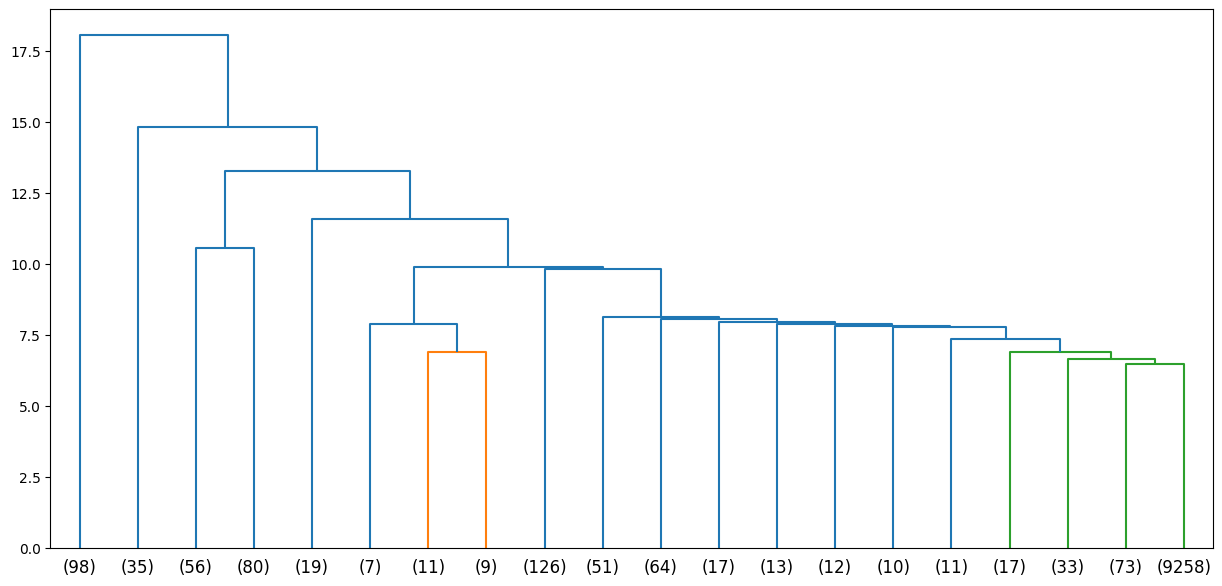

In [57]:
fig = plt.figure(figsize=(15, 7))

_ = dendrogram(hier_link_ward, orientation='top', truncate_mode='lastp', p=20, color_threshold=7)

plt.show()

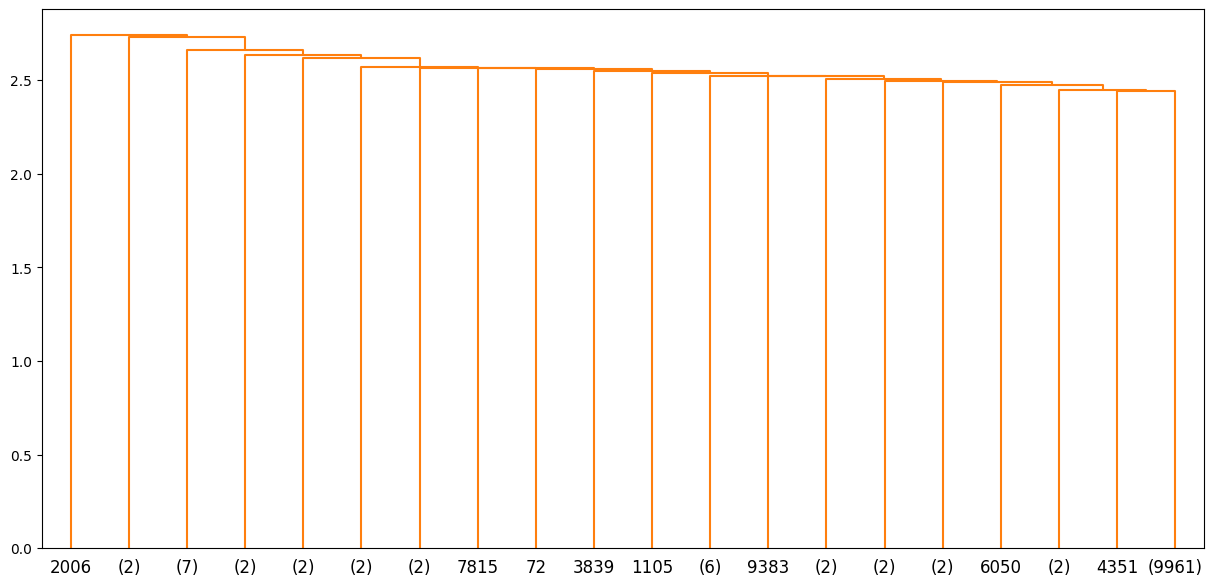

In [58]:
fig = plt.figure(figsize=(15, 7))

_ = dendrogram(hier_link_avg, orientation='top', truncate_mode='lastp', p=20, color_threshold=7)

plt.show()

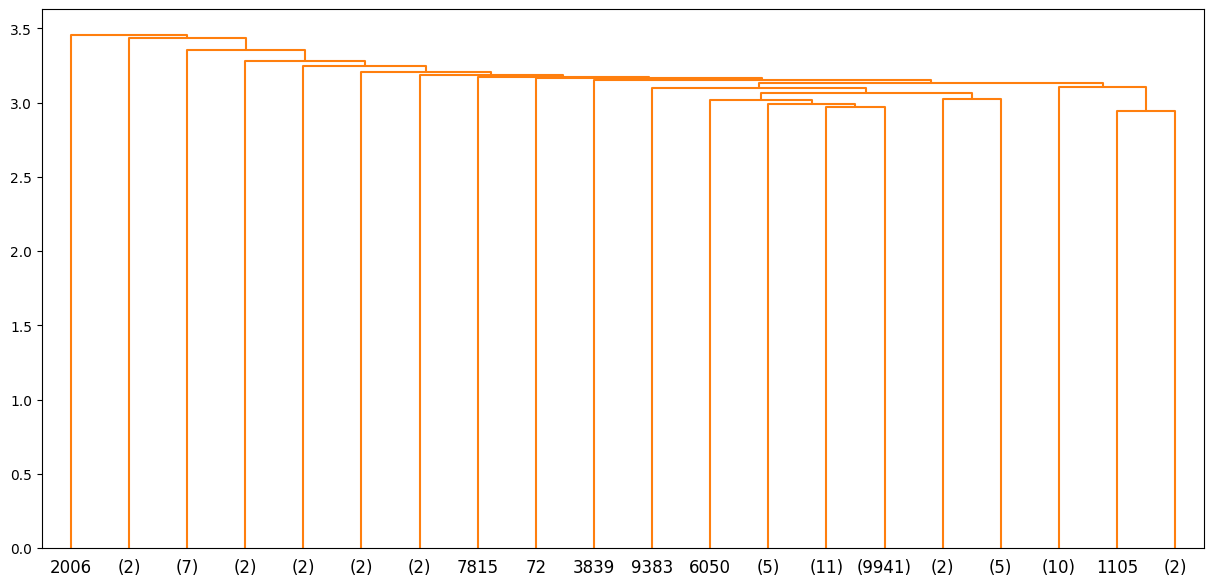

In [59]:
fig = plt.figure(figsize=(15, 7))

_ = dendrogram(hier_link_complete, orientation='top', truncate_mode='lastp', p=20, color_threshold=7)

plt.show()

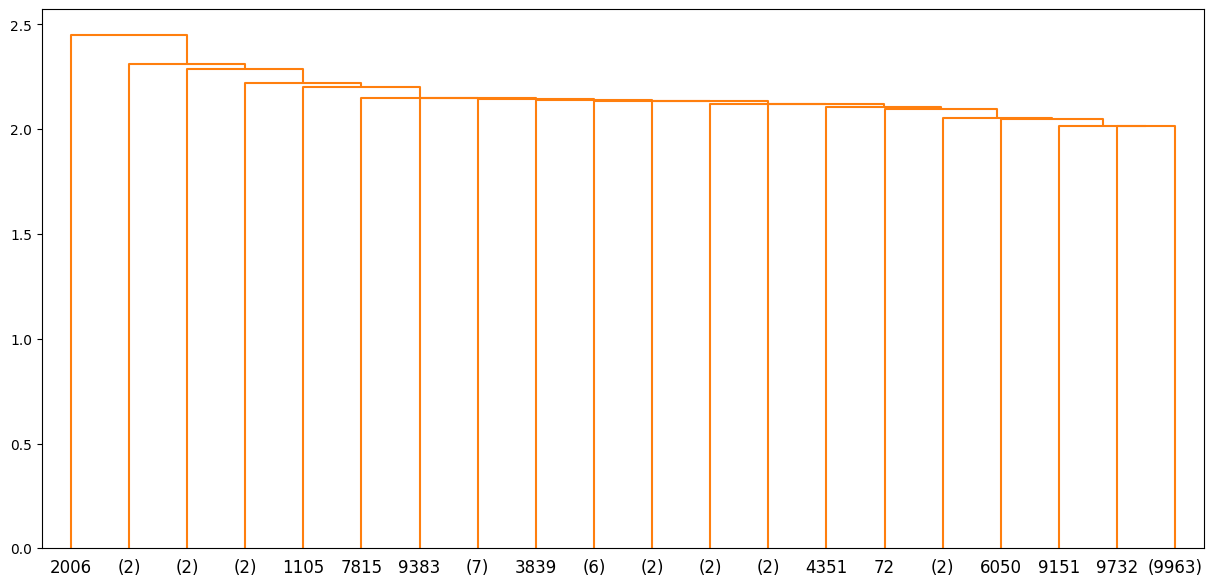

In [60]:
fig = plt.figure(figsize=(15, 7))

_ = dendrogram(hier_link_single, orientation='top', truncate_mode='lastp', p=20, color_threshold=7)

plt.show()

As hierarchical clustering gives rather poor results on textual data, these results are not surprising, therefore it will not be necessary to save the given model